In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flights=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/nycflights13/flights.csv")

In [ ]:
flights

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,336773,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,336774,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,336775,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


We now recall the speed vs distance dataframe that you created from the NYCflights13 dataset in Homework 1. (Here done as a single chain.)

Text(0, 0.5, 'Speed')

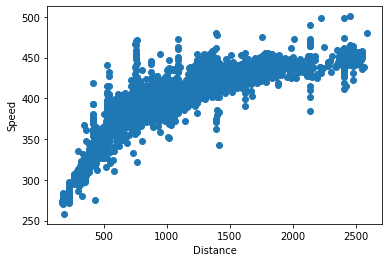

In [ ]:
flights=(
    flights[['tailnum','distance','air_time']][pd.notna(flights['air_time'])].
    assign(speed=lambda x:60*x.distance/x.air_time).
    groupby('tailnum').
    agg('mean').
    sort_values('distance',ascending=False)[32:]
)

plt.scatter(flights.distance,flights.speed)
plt.xlabel('Distance')
plt.ylabel('Speed')

**IMPORTANT:**
DO NOT CHANGE ```flights```!! If you need to add more columns for any reason, make a copy and call it something else.

Problem 1.

Create a linear model of speed vs distance that accurately predicts the speed of the planes with the lowest and highest distances.

In [ ]:
t=flights
t[['distance','speed']].sort_values(by= 'distance')
t.speed[-1]

271.16757777870873

In [ ]:
slope = (480.3715170278638-271.16757777870873)/(2586.000000 - 173.09333333333333)
slope

0.08670204369660175

In [ ]:
test = flights
intercept = t.iloc[-1].speed - (0.08670204369660175 * t.iloc[-1].distance)
intercept

256.1600320284516

In [ ]:
def linear_mod1(distance):
  return (distance * 0.08670204369660175) + 256.1600320284516

Run this code to visualize your model's predictions, as compared to the actual:

Text(0, 0.5, 'Speed')

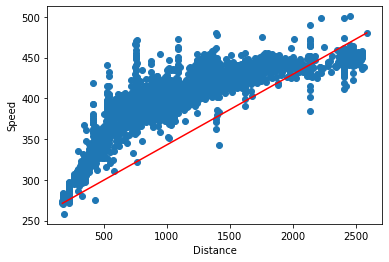

In [ ]:
plt.scatter(flights.distance,flights.speed)
plt.plot(flights.distance,linear_mod1(flights.distance),'-r')
plt.xlabel('Distance')
plt.ylabel('Speed')

Problem 1b.

Calculate the RSS of ```linear_mod1```.

In [ ]:
p1 = flights
p1['pred'] = p1.apply(lambda x: linear_mod1(x.distance), axis = 1)
p1['difference'] = (p1['speed']-p1['pred'])**2
RSS1 = p1.difference.sum()
RSS1

12466892.633266669

Problem 2.

Create a linear model of speed vs distance that minimizes the RSS.

In [ ]:
X = np.ones((len(flights.distance),2))
X[:,0]=flights.distance
y= flights.speed
np.linalg.inv(X.T@X)@(X.T@y)

array([5.67829215e-02, 3.37139696e+02])

In [ ]:
def linear_mod2(distance):
  #X = np.ones((len(distance),2))
  #X[:,0]=distance
  #y= speed
  #return np.linalg.inv(X.T@X)@(X.T@y) #256.16003 is our y axis so are we multiplying by y
  return (distance * 5.67829215e-02) + 3.37139696e+02

Run this code to visualize your model. Does it look better?

Text(0, 0.5, 'Speed')

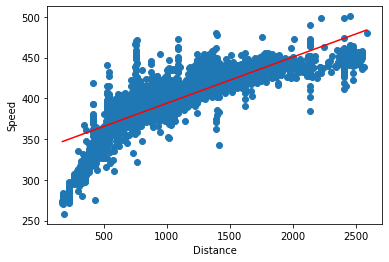

In [ ]:
plt.scatter(flights.distance,flights.speed)
plt.plot(flights.distance,linear_mod2(flights.distance),'-r')
plt.xlabel('Distance')
plt.ylabel('Speed')

Problem 2b.

Calculate the RSS of ```linear_mod2```.

In [ ]:
p2 = flights
p2['pred'] = p2.apply(lambda x: linear_mod2(x.distance), axis = 1)
p2['differences'] = (p2['speed']-p2['pred'])**2
RSS2 = p2.differences.sum()
RSS2

1843267.6564223971

How does that compare to RSS1?

Problem 3.

Create a quadratic model of speed vs distance that minimizes the RSS.

In [ ]:
p3 = np.ones((len(flights.distance),3))
p3[:,0]=flights.distance
p3[:,1]=flights.difference**2
yy= flights.speed
np.linalg.inv(p3.T@p3)@(p3.T@yy)
#WHY WONT THIS GIVE ME THE CORRECT VALUES

array([6.29363752e-02, 4.83651580e-07, 3.23104903e+02])

In [ ]:
def quadratic_mod(distance):
  return -3.73578974e-05*(distance**2) + 1.53837303e-01*distance + 2.86811090e+02

Now visualize it:

Text(0, 0.5, 'Speed')

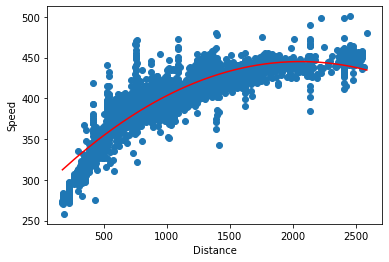

In [ ]:
plt.scatter(flights.distance,flights.speed)
plt.plot(flights.distance,quadratic_mod(flights.distance),'-r')
plt.xlabel('Distance')
plt.ylabel('Speed')

Problem 3b.

Calculate the RSS of ```quadratic_mod```.

In [ ]:
p3 = flights
p3['pred'] = p3.apply(lambda x: quadratic_mod(x.distance), axis = 1)
p3['difference'] = (p3['speed']-p3['pred'])**2
RSSquad= p3.difference.sum()
RSSquad

1080356.9413793983

How does that compare to RSS1 and RSS2?

Problem 4.

You may have noticed from your graph that the data looks a bit more logarithmic than polynomial. Use linear regression to define a model of the form
$$speed=a\ln{(distance)}+b.$$
Then, plot your model and calculate its RSS.

In [ ]:
foury = flights
foury['ones'] = foury.distance/foury.distance
foury['log'] = np.log(foury.distance)
fourx = foury[['log','ones']]
foury = np.linalg.inv(fourx.T@fourx)@(fourx.T@foury.speed)
foury


array([ 64.02370884, -40.31371855])

In [ ]:
def log_mod(distance):
  return np.log(distance)*64.02370884 + -40.31371855
  #return (distance * logdistance) + 5.82439806e+00

In [ ]:
p4 = flights
p4['pred'] = p4.apply(lambda x: log_mod(x.distance), axis = 1)
p4['difference'] = (p4['speed']-p4['pred'])**2
RSSlog= p4.difference.sum()
RSSlog

947713.5215110581

How does that compare to the RSS values for the previous models?